# Défi AIF - code statistiques descriptives

In [101]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import mca
from mca import MCA

## Chargement des données

In [2]:
requests=pd.read_csv("laulau_data.csv",sep=",",header=0)
requests.index=requests['hotel_id']
requests=requests.drop(['Unnamed: 0'], axis=1)
requests=requests.drop(['index'], axis=1)
requests=requests.drop(['hotel_id'],axis=1)
requests.head()

,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile,avatar_name
hotel_id,,,,,,,,,,,,
519,Yin Yang,Royal Lotus,copenhagen,0,0,0,208,68,30,french,0,laulau
523,Independant,Independant,copenhagen,0,0,0,85,41,30,french,0,laulau
898,Yin Yang,8 Premium,copenhagen,1,0,0,86,24,30,french,0,laulau
770,Morriott International,Morriot,copenhagen,1,1,0,210,73,30,french,0,laulau
562,Chillton Worldwide,Quadrupletree,copenhagen,0,0,0,215,74,30,french,0,laulau


## Some descriptive statistics

### Study of the variable "parking"

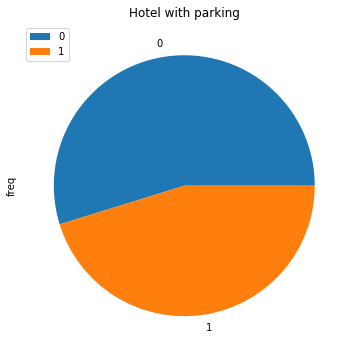

In [3]:
t = pd.crosstab(requests["parking"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with parking")
plt.show()

### Study of the variable "pool"

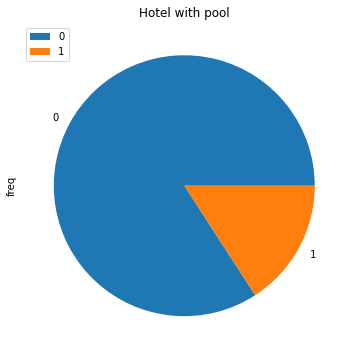

In [4]:
t = pd.crosstab(requests["pool"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with pool")
plt.show()

### Study of the variable "children policy"

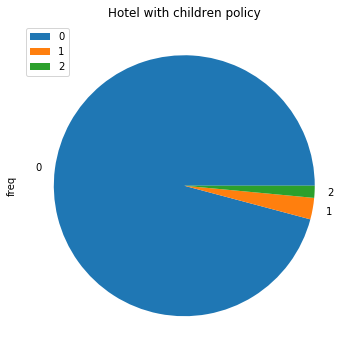

In [5]:
t = pd.crosstab(requests["children_policy"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with children policy")
plt.show()

### Study of the hotel price

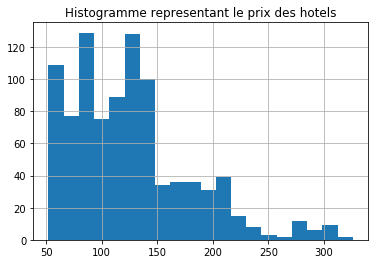

In [6]:
requests["price"].hist(bins=20)
plt.title("Histogramme representant le prix des hotels")
plt.show()

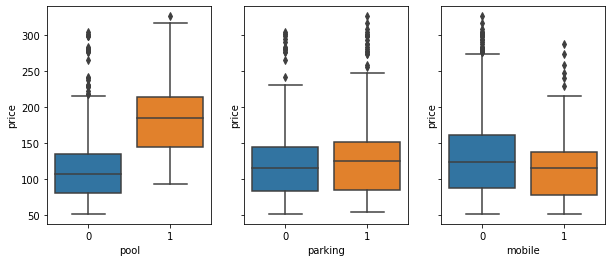

In [10]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 4))
sns.boxplot(x='pool', y='price', data=requests,ax=axes[0])
sns.boxplot(x='parking', y='price', data=requests,ax=axes[1])
sns.boxplot(x='mobile', y='price', data=requests,ax=axes[2])

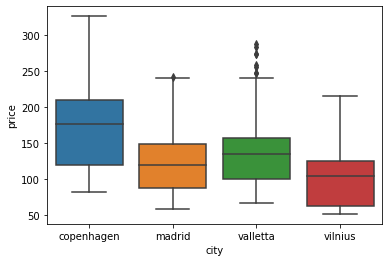

In [13]:
sns.boxplot(x='city', y='price', data=requests)

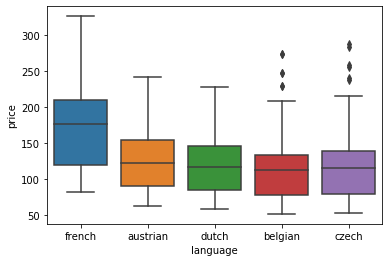

In [14]:
sns.boxplot(x='language', y='price', data=requests)

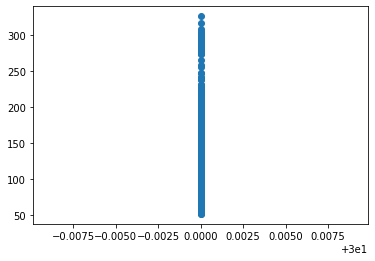

In [88]:
plt.scatter(requests['date'], requests['price'])
#plt.axis([0, 30,0, 350])

## AFCM (Analyse Factorielle des Correspondances Multiples)

In [132]:
# on transforme le prix de l'hotel en variables catégorielle à l'aide des quantiles d'ordre 0.33 et 0.66
quant_price=np.quantile(requests['price'],[0.33,0.66])
data_afcm=requests.assign(categ_price="medium_price")
data_afcm.loc[data_afcm.price<=quant_price[0],'categ_price']='low_price'
data_afcm.loc[data_afcm.price>=quant_price[1],'categ_price']='high_price'
data_afcm=data_afcm.drop(['price'], axis=1)

quant_stock=np.quantile(requests['stock'],[0.33,0.66])
data_afcm=data_afcm.assign(categ_stock="medium_stock")
data_afcm.loc[data_afcm.stock<=quant_stock[0],'categ_stock']='low_stock'
data_afcm.loc[data_afcm.stock>=quant_stock[1],'categ_stock']='high_stock'
data_afcm=data_afcm.drop(['stock'], axis=1)


quant_date=np.quantile(requests['date'],[0.33,0.66])
data_afcm=data_afcm.assign(categ_date="medium_date")
data_afcm.loc[data_afcm.date<=quant_date[0],'categ_date']='near_date'
data_afcm.loc[data_afcm.date>=quant_date[1],'categ_date']='far_date'
data_afcm=data_afcm.drop(['date'], axis=1)

data_afcm=data_afcm.drop(['group'], axis=1)
data_afcm=data_afcm.drop(['brand'], axis=1)
data_afcm=data_afcm.drop(['avatar_name'], axis=1)

data_afcm["categ_price"]=pd.Categorical(data_afcm["categ_price"],ordered=False)
#data_afcm["categ_stock"]=pd.Categorical(data_afcm["categ_stock"],ordered=False)
data_afcm["categ_date"]=pd.Categorical(data_afcm["categ_date"],ordered=False)
data_afcm["parking"]=pd.Categorical(data_afcm["parking"],ordered=False)
data_afcm["pool"]=pd.Categorical(data_afcm["pool"],ordered=False)
data_afcm["children_policy"]=pd.Categorical(data_afcm["children_policy"],ordered=False)
data_afcm["language"]=pd.Categorical(data_afcm["language"],ordered=False)
data_afcm["mobile"]=pd.Categorical(data_afcm["mobile"],ordered=False)
data_afcm["city"]=pd.Categorical(data_afcm["city"],ordered=False)

data_afcm

,city,parking,pool,children_policy,language,mobile,categ_price,categ_stock,categ_date
hotel_id,,,,,,,,,
519,copenhagen,0,0,0,french,0,high_price,high_stock,far_date
523,copenhagen,0,0,0,french,0,low_price,low_stock,far_date
898,copenhagen,1,0,0,french,0,low_price,low_stock,far_date
770,copenhagen,1,1,0,french,0,high_price,high_stock,far_date
562,copenhagen,0,0,0,french,0,high_price,high_stock,far_date
...,...,...,...,...,...,...,...,...,...
498,vilnius,0,0,0,czech,1,medium_price,low_stock,far_date
516,vilnius,1,0,2,czech,1,high_price,high_stock,far_date
187,vilnius,1,1,0,czech,1,high_price,high_stock,far_date


In [131]:
dc=pd.DataFrame(pd.get_dummies(data_afcm))
dc.head()

,categ_date,categ_price,categ_stock,children_policy,city,language,mobile,parking,pool
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0


In [125]:
mcaFic=MCA(dc,benzecri=False)

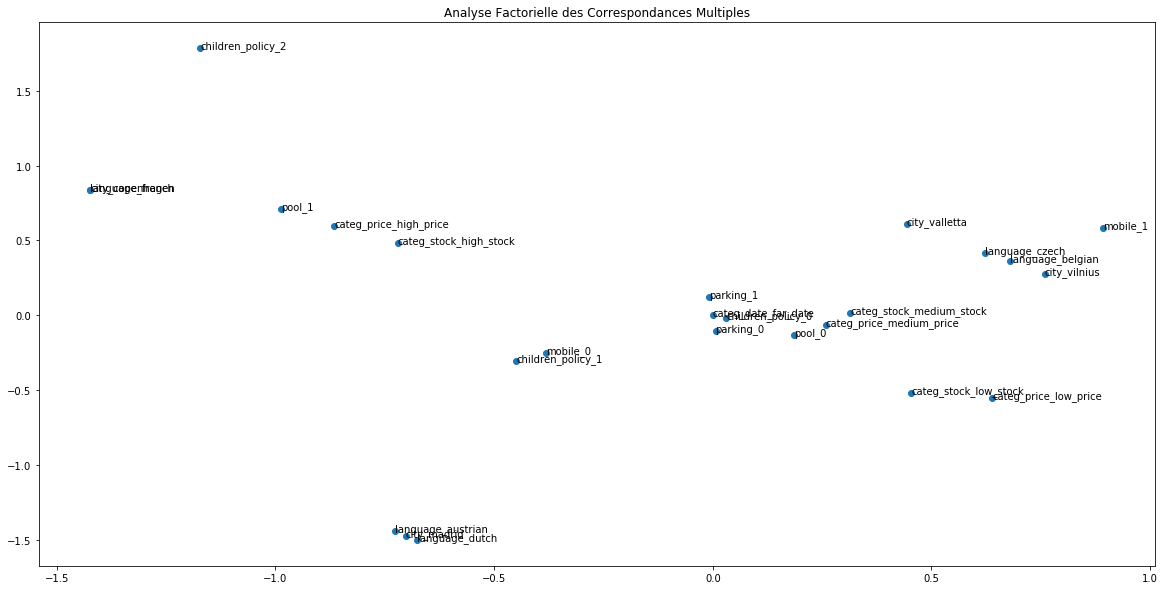

In [126]:
fig = plt.figure(1, figsize=(20, 10))
plt.scatter(mcaFic.fs_c()[:, 0],mcaFic.fs_c()[:, 1])
for i, j, nom in zip(mcaFic.fs_c()[:, 0],mcaFic.fs_c()[:, 1], dc.columns):
       plt.text(i, j, nom)
plt.title("Analyse Factorielle des Correspondances Multiples")
plt.show()